In [1]:
import os

import numpy as np

import librosa

import librosa.display

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler

from sklearn.utils.class_weight import compute_class_weight

import tensorflow as tf

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Model

from tensorflow.keras.layers import Input, Dense, RNN, Layer

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.regularizers import l2

# tf.keras.backend.clear_session()

In [2]:
# # Emotion labels in IEMOCAP

# emotions = {'ang': 0, 'hap': 1, 'sad': 2, 'neu': 3}


In [3]:
# def load_iemocap_data(data_path):

#     data = []

#     labels = []

#     sessions = [f'Session{i}' for i in range(1, 6)]

#     for session in sessions:

#         wav_folder = os.path.join(data_path, session, 'sentences', 'wav')

#         # print(wav_folder)

#         emo_eval_folder = os.path.join(data_path, session, 'dialog', 'EmoEvaluation')

#         # print(emo_eval_folder)

#         for root, _, files in os.walk(wav_folder):

#             for file in files:

#                 if file.endswith('.wav'):

#                     wav_file = os.path.join(root, file)

#                     # Corresponding emotion label file

#                     emo_file = os.path.join(emo_eval_folder, os.path.basename(root) + '.txt')

#                     with open(emo_file, 'r') as f:

#                         for line in f:

#                             if file[:-4] in line:

#                                 parts = line.strip().split('\t')

#                                 if len(parts) >= 4:

#                                     emotion = parts[2]

#                                     if emotion in emotions:

#                                         data.append(wav_file)

#                                         labels.append(emotions[emotion])

#                                 break

#     return data, labels



# # Load data

# data_path = 'C:\\Projects\\DL\\IEMOCAP'  # Update this path

# data_files, data_labels = load_iemocap_data(data_path)

# print(f'Total samples loaded: {len(data_files)}')


In [4]:
def extract_features(file_name):

    audio, sample_rate = librosa.load(file_name, sr=None)

    # Extract MFCCs

    mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=13)

    # Compute delta and delta-delta of MFCCs

    mfcc_delta = librosa.feature.delta(mfcc)

    mfcc_delta2 = librosa.feature.delta(mfcc, order=2)

    # Concatenate features

    features = np.concatenate((mfcc, mfcc_delta, mfcc_delta2), axis=0)

    return features.T  # Shape: (time_steps, features)



# Example usage

# features = extract_features(data_files[0])

# print(features)


In [5]:
def augment_audio(audio, sample_rate):

    augmented_audios = []

    # Pitch Shifting

    audio_pitched = librosa.effects.pitch_shift(audio, sr=sample_rate, n_steps=2)

    augmented_audios.append(audio_pitched)

    # Time Stretching

    audio_stretched = librosa.effects.time_stretch(audio, rate=0.9)

    augmented_audios.append(audio_stretched)

    # Adding Noise

    noise = np.random.normal(0, 0.005, audio.shape)

    audio_noisy = audio + noise

    augmented_audios.append(audio_noisy)

    return augmented_audios


In [6]:
def extract_features_from_audio(audio, sample_rate):

    mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=13)

    mfcc_delta = librosa.feature.delta(mfcc)

    mfcc_delta2 = librosa.feature.delta(mfcc, order=2)

    features = np.concatenate((mfcc, mfcc_delta, mfcc_delta2), axis=0)

    return features.T





# X = []

# y = []



# for i, file in enumerate(data_files):

#     audio, sr = librosa.load(file, sr=None)

#     # Original features

#     features = extract_features_from_audio(audio, sr)

#     X.append(features)

#     y.append(data_labels[i])

#     # Data augmentation

#     augmented_audios = augment_audio(audio, sr)

#     for aug_audio in augmented_audios:

#         # Ensure same length

#         aug_audio = librosa.util.fix_length(aug_audio, size=len(audio))

#         features_aug = extract_features_from_audio(aug_audio, sr)

#         X.append(features_aug)

#         y.append(data_labels[i])




In [7]:
# # Find the maximum sequence length

# sequence_lengths = [len(features) for features in X]

# max_length = max(sequence_lengths)

# print(f'Maximum sequence length: {max_length}')



# # Pad sequences

# def pad_sequence(features, max_length):

#     if len(features) < max_length:

#         pad_width = max_length - len(features)

#         return np.pad(features, ((0, pad_width), (0, 0)), mode='constant')

#     else:

#         return features[:max_length, :]



# X_padded = [pad_sequence(features, max_length) for features in X]

# X_padded = np.array(X_padded)

# y = np.array(y)

# print(f'Shape of X_padded: {X_padded.shape}')


In [8]:
# # Reshape for normalization

# num_samples, time_steps, num_features = X_padded.shape

# X_reshaped = X_padded.reshape(-1, num_features)



# # Standardize features

# scaler = StandardScaler()

# X_normalized = scaler.fit_transform(X_reshaped)



# # Reshape back to original shape

# X_normalized = X_normalized.reshape(num_samples, time_steps, num_features)


In [9]:
# # Compute class weights

# class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)

# class_weight_dict = dict(enumerate(class_weights))

# print(f'Class weights: {class_weight_dict}')


In [10]:
# # One-hot encode labels

# num_classes = len(emotions)

# y_encoded = to_categorical(y, num_classes=num_classes)



# # Split into training and testing sets

# X_train, X_test, y_train, y_test = train_test_split(

#     X_normalized, y_encoded, test_size=0.2, random_state=42, stratify=y)



# print(f'Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}')


In [11]:
# prompt: load X and y csv from google drive



import pandas as pd

# from google.colab import drive



# drive.mount('/content/drive')

# X_train = np.load('/content/drive/MyDrive/Deep Learning Project/X_train.npy')

# X_test = np.load('/content/drive/MyDrive/Deep Learning Project/X_test.npy')

# y_train = np.load('/content/drive/MyDrive/Deep Learning Project/y_train.npy')

# y_test = np.load('/content/drive/MyDrive/Deep Learning Project/y_test.npy')

# num_classes = 4

# class_weight = np.load('/content/drive/MyDrive/Deep Learning Project/class_weights.npy')

# class_weight_dict = dict(enumerate(class_weight))



# print(f'Shape of X_train: {X_train.shape}')

# print(f'Shape of X_test: {X_test.shape}')

# print(f'Shape of y_train: {y_train.shape}')

# print(f'Shape of y_test: {y_test.shape}')

input_dir = '/kaggle/input/lnn-dl-6'  # Replace with the correct path to your .npy files

X_train = np.load(os.path.join(input_dir, 'X_train.npy'))
X_test = np.load(os.path.join(input_dir, 'X_test.npy'))
y_train = np.load(os.path.join(input_dir, 'y_train.npy'))
y_test = np.load(os.path.join(input_dir, 'y_test.npy'))
class_weight = np.load(os.path.join(input_dir, 'class_weights.npy'))

# Convert class weights to a dictionary
num_classes = 4
class_weight_dict = dict(enumerate(class_weight))

# Print shapes of the loaded arrays
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

# print(lnn_dl_path)

Shape of X_train: (14368, 998, 39)
Shape of X_test: (3592, 998, 39)
Shape of y_train: (14368, 4)
Shape of y_test: (3592, 4)


In [12]:
def clipped_relu(x):

    return tf.keras.activations.relu(x, max_value=20.0)



def clipped_sigmoid(x):

    return tf.keras.activations.sigmoid(x) * 10.0

In [13]:
import tensorflow.keras as keras
@keras.utils.register_keras_serializable(package="Custom", name="LTCCell")
class LTCCell(Layer):

    def __init__(self, units, ode_unfolds=6, l2_reg=0.001, **kwargs):

        super(LTCCell, self).__init__(**kwargs)

        self.units = units

        self.ode_unfolds = ode_unfolds

        self.state_size = units

        self.l2_reg = l2_reg  # L2 regularization parameter



    def build(self, input_shape):

        self.input_dim = input_shape[-1]



        # Trainable parameters with L2 regularization

        self.W = self.add_weight(

            shape=(self.input_dim + self.units, self.units),

            initializer='glorot_uniform',

            regularizer=l2(self.l2_reg),

            name='W'

        )

        self.bias = self.add_weight(

            shape=(self.units,),

            initializer='zeros',

            name='bias'

        )

        self.tau = self.add_weight(

            shape=(self.units,),

            initializer='ones',

            name='tau'

        )



        # Additional parameters for the LTC model

        self.C = self.add_weight(

            shape=(self.units,),

            initializer='ones',

            name='C'

        )

        self.G = self.add_weight(

            shape=(self.units,),

            initializer='ones',

            name='G'

        )



        super(LTCCell, self).build(input_shape)



    def call(self, inputs, states):

        prev_state = states[0]

        concatenated = tf.concat([inputs, prev_state], axis=1)

        dt = 0.01  # Time step



        for _ in range(self.ode_unfolds):

            dh = (-prev_state + tf.nn.tanh(tf.matmul(concatenated, self.W) + self.bias)) / tf.nn.softplus(self.tau)

            prev_state += dt * dh



        # Apply custom activation functions

        prev_state = clipped_relu(prev_state)

        prev_state = prev_state * clipped_sigmoid(self.C)

        prev_state = prev_state / clipped_sigmoid(self.G)



        return prev_state, [prev_state]
    
    def get_config(self):
        
        config = super(LTCCell, self).get_config()
        
        config.update({"units": self.units})
        
        return config

In [14]:
def build_lnn_model(input_shape, units, num_classes, l2_reg=0.001):

    inputs = Input(shape=input_shape)

    ltc_cell = LTCCell(units=units, ode_unfolds=6, l2_reg=l2_reg)

    rnn_layer = RNN(ltc_cell, return_sequences=False)

    x = rnn_layer(inputs)

    outputs = Dense(num_classes, activation='softmax', kernel_regularizer=l2(l2_reg))(x)

    model = Model(inputs=inputs, outputs=outputs)

    return model

In [15]:
input_shape = (X_train.shape[1], X_train.shape[2])  # (time_steps, features)

units = 16

num_classes = 4  # Number of emotion classes

In [19]:
model = build_lnn_model(input_shape, units, num_classes, l2_reg=0.0005)


optimizer = Adam(learning_rate=0.0005)

model.compile(optimizer=optimizer,

              loss='categorical_crossentropy',
              # loss=custom_focal_loss,

              metrics=['accuracy'])

In [20]:
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 998, 39)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn (RNN)                       │ (None, 16)             │           944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,012 (3.95 KB)

 Trainable params: 1,012 (3.95 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau



early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)


In [22]:
# history = model.fit(

#     X_train, y_train,

#     epochs=100,

#     batch_size=32,

#     validation_data=(X_test, y_test),

#     class_weight=class_weight_dict,

#     callbacks=[early_stopping, lr_reduction]

# )

# Train the model

history = model.fit(

    X_train, y_train,

    epochs=100,

    batch_size=64,

    validation_data=(X_test, y_test),

    callbacks=[early_stopping]



)



# Evaluate the model

# loss, accuracy = model.evaluate(X_test, y_test)

# print(f'Test Accuracy: {accuracy}')

Epoch 1/100


I0000 00:00:1734213167.917719      92 service.cc:145] XLA service 0x7ca84808cd30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734213167.917782      92 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  1/225 ━━━━━━━━━━━━━━━━━━━━ 18:41 5s/step - accuracy: 0.2031 - loss: 1.4106

I0000 00:00:1734213169.980919      92 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


225/225 ━━━━━━━━━━━━━━━━━━━━ 39s 152ms/step - accuracy: 0.3526 - loss: 1.3806 - val_accuracy: 0.3806 - val_loss: 1.3321
Epoch 2/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 30s 134ms/step - accuracy: 0.3820 - loss: 1.3335 - val_accuracy: 0.3806 - val_loss: 1.3298
Epoch 3/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 30s 134ms/step - accuracy: 0.3817 - loss: 1.3274 - val_accuracy: 0.3806 - val_loss: 1.3278
Epoch 4/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 30s 134ms/step - accuracy: 0.3828 - loss: 1.3263 - val_accuracy: 0.3811 - val_loss: 1.3261
Epoch 5/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 30s 133ms/step - accuracy: 0.3873 - loss: 1.3252 - val_accuracy: 0.3822 - val_loss: 1.3243
Epoch 6/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 30s 133ms/step - accuracy: 0.4339 - loss: 1.2305 - val_accuracy: 0.4571 - val_loss: 1.1268
Epoch 7/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 30s 134ms/step - accuracy: 0.5029 - loss: 1.1092 - val_accuracy: 0.5754 - val_loss: 1.0399
Epoch 8/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 30s 134ms/step - accuracy: 0.5788 - loss: 1.046

In [23]:
# Evaluate on test data

test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6153 - loss: 0.9471
Test Accuracy: 61.44%


In [24]:
# Predict classes

y_pred_probs = model.predict(X_test)

y_pred = np.argmax(y_pred_probs, axis=1)

y_true = np.argmax(y_test, axis=1)



# Classification report

target_names = ['angry', 'happy', 'sad', 'neutral']

print(classification_report(y_true, y_pred, target_names=target_names))


113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step
              precision    recall  f1-score   support

       angry       0.81      0.68      0.74       883
       happy       0.00      0.00      0.00       476
         sad       0.59      0.73      0.65       867
     neutral       0.55      0.71      0.62      1366

    accuracy                           0.61      3592
   macro avg       0.49      0.53      0.50      3592
weighted avg       0.55      0.61      0.57      3592



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


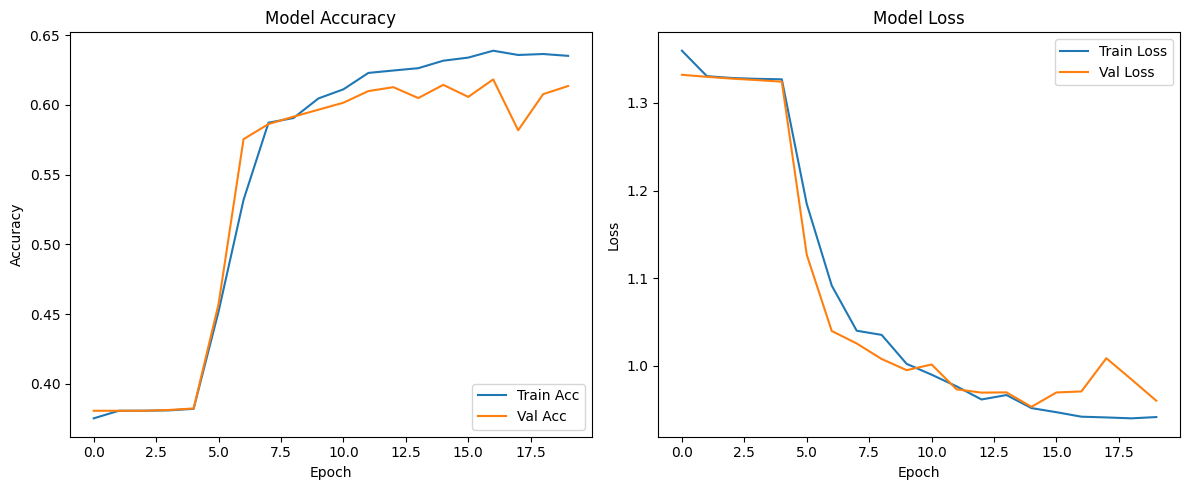

In [25]:
# Plot training & validation accuracy values

plt.figure(figsize=(12, 5))



plt.subplot(1, 2, 1)

plt.plot(history.history['accuracy'], label='Train Acc')

plt.plot(history.history['val_accuracy'], label='Val Acc')

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(loc='lower right')



# Plot training & validation loss values

plt.subplot(1, 2, 2)

plt.plot(history.history['loss'], label='Train Loss')

plt.plot(history.history['val_loss'], label='Val Loss')

plt.title('Model Loss')

plt.ylabel('Loss')

plt.xlabel('Epoch')

plt.legend(loc='upper right')



plt.tight_layout()

plt.show()


In [26]:
model.save('emotion_model_625.h5')